In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
ger_cre=pd.read_csv('german_credit.csv')

In [4]:
ger_cre.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
# Print Shape of model data
ger_cre.shape

(1000, 21)

In [7]:
ger_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [8]:
categorical_feature_mask = ger_cre.dtypes==object
categorical_cols = ger_cre.columns[categorical_feature_mask]
dummies=pd.get_dummies(ger_cre[categorical_cols])
dummies.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [9]:
ger_concat=pd.concat([ger_cre,dummies],axis=1)
ger_concat=ger_concat.drop(columns=categorical_cols)
print(ger_concat.shape)
ger_concat.head()

(1000, 62)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [63]:
ger_concat.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


In [11]:
# Considering the integer features and Based on the co-relation heatmap, we can observe that Credit_amount, duration_in_month are moderately co-related at 0.62

### Drop the original variables which are converted to dummy

In [43]:
ger_cre=ger_concat

In [44]:
ger_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

In [45]:
ger_cre.shape

(1000, 62)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [46]:
x=ger_cre.drop(columns=['default'])
y=ger_cre['default']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=26)

In [48]:
print('Train set:',x.shape,'\nTest set:',y.shape)
print('x.train:',x_train.shape,'\ny.train:',y_train.shape)

Train set: (1000, 61) 
Test set: (1000,)
x.train: (700, 61) 
y.train: (700,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl_ger = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl_ger_cre = rfcl_ger.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_predict = rfcl_ger_cre.predict(x_test)
print(rfcl_ger_cre.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.78
[[199  22]
 [ 44  35]]


### Q6 Show the list of the features importance( 1 Marks)

In [59]:
print("Below listed feature importance in decending order")
(pd.DataFrame([rfcl_ger_cre.feature_importances_],columns=x_train.columns).T).sort_values(by=0,ascending=False)

Below listed feature importance in decending order


,0
credit_amount,0.088464
age,0.082856
duration_in_month,0.074427
account_check_status_no checking account,0.051723
installment_as_income_perc,0.036485
present_res_since,0.034617
account_check_status_< 0 DM,0.031107
credit_history_critical account/ other credits existing (not at this bank),0.024313
other_installment_plans_none,0.020408
purpose_car (new),0.018269


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [60]:
from sklearn.model_selection import KFold

In [61]:
# Use below values
num_folds = 10
seed = 77

In [62]:
#Validate the Random Forest model build above using k fold

In [84]:
ger_score=[]

ger_kflod=KFold(n_splits=num_folds,random_state=seed)

for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = rfcl_ger.fit(x_train.iloc[train,:], y_train.iloc[train])
    ger_score.append(rfcl_ger_cre.score(x_test , y_test))

In [85]:
col=[]
for i in range(1,11):
    j='Fold '+ str(i)
    col.append(j)
Model_score_KFold=pd.DataFrame(ger_score).T
Model_score_KFold.columns=col
print('Model Score for 10 Folds are listed blow:')
Model_score_KFold

Model Score for 10 Folds are listed blow:


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
0,0.77,0.77,0.776667,0.776667,0.776667,0.79,0.766667,0.763333,0.763333,0.776667


In [66]:
#Calculate Mean score

In [67]:
print('Mean of the score is:',np.mean(ger_score).round(3))

Mean of the score is: 0.773


In [68]:
# Calculate score standard deviation using std()

In [69]:
print(' standard deviation of the score is:',np.std(ger_score).round(4))

 standard deviation of the score is: 0.0077


# Q8 Print the confusion matrix( 1 Marks)

In [70]:
ger_score=[]

ger_kflod=KFold(n_splits=10,random_state=77)
i=1
for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = rfcl_ger.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_predict = rfcl_ger_cre.predict(x_test)
    i=0+i
    print('Confusion matrics for Fold'+str(i),':\n',metrics.confusion_matrix(y_test, y_predict))
    i=i+1

Confusion matrics for Fold1 :
 [[195  26]
 [ 43  36]]
Confusion matrics for Fold2 :
 [[200  21]
 [ 48  31]]
Confusion matrics for Fold3 :
 [[198  23]
 [ 44  35]]
Confusion matrics for Fold4 :
 [[201  20]
 [ 47  32]]
Confusion matrics for Fold5 :
 [[200  21]
 [ 46  33]]
Confusion matrics for Fold6 :
 [[206  15]
 [ 48  31]]
Confusion matrics for Fold7 :
 [[199  22]
 [ 48  31]]
Confusion matrics for Fold8 :
 [[203  18]
 [ 53  26]]
Confusion matrics for Fold9 :
 [[198  23]
 [ 48  31]]
Confusion matrics for Fold10 :
 [[198  23]
 [ 44  35]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [74]:
y_predict=rfcl_ger_cre.predict(x_test)
from sklearn.metrics import classification_report

print('Classification accuracy and sensitivity as shown below:')
pre_dat_NB=pd.DataFrame(classification_report(y_test,y_predict,output_dict=True)).T
pre_dat_NB

Classification accuracy and sensitivity as shown below:


,f1-score,precision,recall,support
0,0.855292,0.818182,0.895928,221.0
1,0.510949,0.603448,0.443038,79.0
micro avg,0.776667,0.776667,0.776667,300.0
macro avg,0.683120,0.710815,0.669483,300.0
weighted avg,0.764615,0.761635,0.776667,300.0


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [75]:
#Hint: Use roc_curve

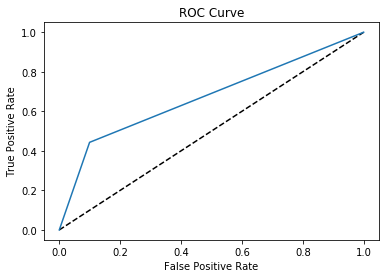

In [76]:
from sklearn.metrics import roc_curve
rfcl_ger_cre = rfcl_ger.fit(x_train, y_train)
y_predict=rfcl_ger_cre.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_predict )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

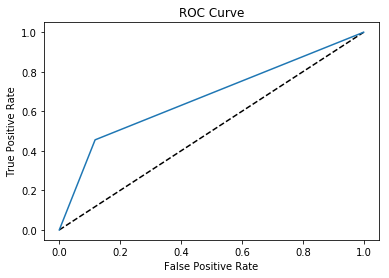

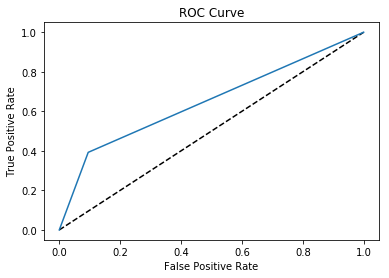

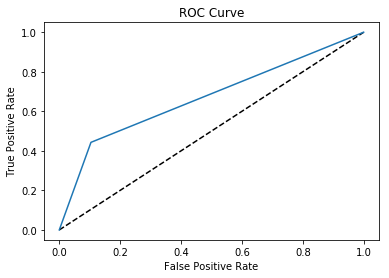

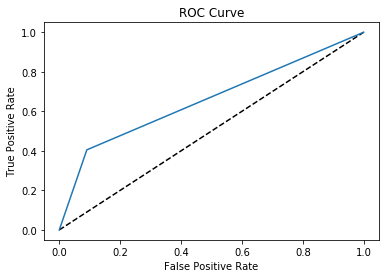

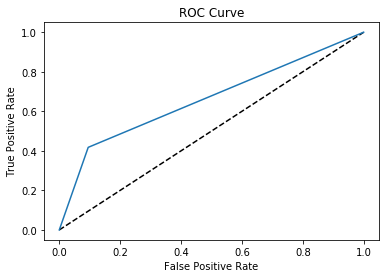

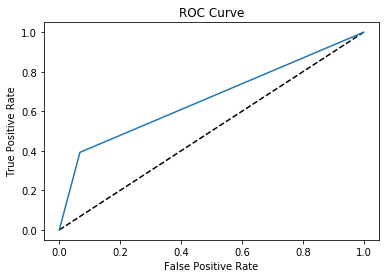

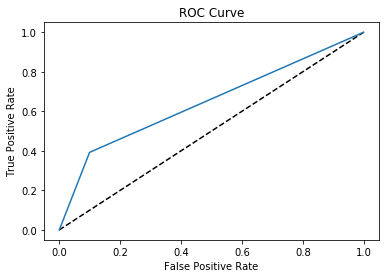

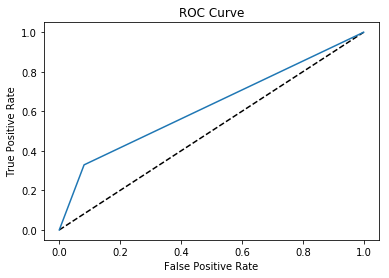

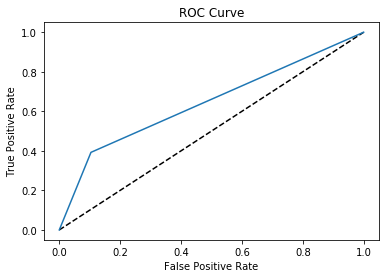

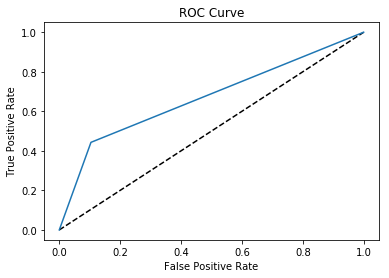

In [77]:
# Just checking to see how my 10 fold set would give me the curve, which i think might give some infereance
for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = rfcl_ger.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_predict=rfcl_ger_cre.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test,y_predict )
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [90]:
from sklearn.metrics import roc_auc_score
y_predict=rfcl_ger_cre.predict(x_test)
auc = roc_auc_score(y_test,y_predict)
print('AUC(Persentage of ROS plot that is underneath the cuve is:)', "{:.2%}".format(auc))

AUC(Persentage of ROS plot that is underneath the cuve is:) 66.95%


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [87]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [88]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [89]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.769
Standard deviation:  0.015779733838059497
